# 1. Data Preprocessing

In [1]:
import importlib
import func
importlib.reload(func)
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [47]:
df_101191 = pd.read_excel("data/191_BWSC101 Release Log Form.xlsx")
df_101592 = pd.read_excel("data/592_BWSC101 Release Log Form.xlsx")
df_101607 = pd.read_excel("data/607_BWSC101 Release Log Form.xlsx")

In [48]:
print(df_101191.shape)
print(df_101592.shape)
print(df_101607.shape)

(10943, 215)
(1535, 223)
(7125, 250)


## 1.1 Process BWSC107

In [22]:
df_107124 = pd.read_excel("data/124_BWSC107 Tier Classification Transmittal Form.xlsx")
df_107621 = pd.read_excel("data/621_BWSC107 Tier Classification Transmittal Form.xlsx")

In [23]:
# df_101191.dtypes.to_csv("101191.csv")
# df_101592.dtypes.to_csv("101592.csv")
# df_101607.dtypes.to_csv("101607.csv")

In [24]:
df_107124["RTN"] = df_107124.apply(func.completeRTN, axis=1)
df_107621["RTN"] = df_107621.apply(func.completeRTN, axis=1)

In [25]:
df_107621revised = df_107621.loc[:, ['B1', 'B1A', 'B1B', 'B7', 'B7A', 'B7B', 'RTN']]
df_107621revised = df_107621revised[(df_107621revised['B1'] == 'Y') | (df_107621revised['B7'] == 'Y')]

In [26]:
df_107621revised['new'] = (df_107621revised['B1'] == 'Y').astype(object)
df_107621revised['newtc'] = (df_107621revised['B1A'] == 'Y').astype(object)
df_107621revised['revised'] = (df_107621revised['B7'] == 'Y').astype(object)
df_107621revised['revisedtc'] = (df_107621revised['B7A'] == 'Y').astype(object)

In [27]:
df_107621revised = df_107621revised.loc[:, ['RTN', 'new', 'newtc', 'revised', 'revisedtc']]

In [28]:
df_107621revised.shape

(942, 5)

In [29]:
df_107124revised = df_107124.loc[:, ['B1', 'B2', 'B1B', 'B8', 'B8A', 'B8B', 'B8C', 'B8D', 'RTN']]
df_107124revised = df_107124revised[(df_107124revised['B1'] == 'Y') 
                                    | (df_107124revised['B2'] == 'Y') 
                                    | (df_107124revised['B8'] == 'Y')]
df_107124revised['new'] = ((df_107124revised['B1'] == 'Y') | (df_107124revised['B2'] == 'Y')).astype(object)
df_107124revised['newtc'] = (df_107124revised['B1'] == 'Y').astype(object)
df_107124revised['revised'] = (df_107124revised['B8'] == 'Y').astype(object)
df_107124revised['revisedtc'] = (df_107124revised['B8D'] != 'Y').astype(object)

In [30]:
df_107124revised = df_107124revised.loc[:, ['RTN', 'new', 'newtc', 'revised', 'revisedtc']]

In [31]:
df_107124revised.shape

(1595, 5)

In [32]:
print(df_107124.shape)
print(df_107124revised.shape)
print(df_107621.shape)
print(df_107621revised.shape)

(3558, 96)
(1595, 5)
(1880, 129)
(942, 5)


In [33]:
df_107 = df_107124revised.append(df_107621revised)

In [34]:
df_107.shape

(2537, 5)

In [35]:
df_107.head()

,RTN,new,newtc,revised,revisedtc
1,3-0022696,True,False,False,True
2,3-0022988,True,False,False,True
6,3-0022548,True,False,False,True
8,2-0015043,True,False,False,True
11,3-0023509,True,False,False,True


In [36]:
df_tier = func.processtiers(df_107)

In [37]:
df_tier.shape

(2396, 2)

In [38]:
df_tier[df_tier["Tier"] == 1].shape

(1694, 2)

In [39]:
df_tier[df_tier["Tier"] == 2].shape

(702, 2)

## 1.2 Process BWSC101

In [49]:
df_101191["RTN"] = df_101191.apply(func.completeRTN, axis=1)
df_101592["RTN"] = df_101592.apply(func.completeRTN, axis=1)
df_101607["RTN"] = df_101607.apply(func.completeRTN, axis=1)

In [50]:
func.preprocess(df_101607, "101607proc.xlsx", "101607")

In [51]:
df_101607.shape

(7125, 144)

In [52]:
func.preprocess(df_101592, "101592proc.xlsx", "101592")

In [53]:
df_101592.shape

(1535, 144)

In [54]:
func.preprocess(df_101191, "101191proc.xlsx", "101191")

In [55]:
df_101 = df_101191.append(df_101592)
df_101 = df_101.append(df_101607)

In [56]:
df_101.shape

(19603, 144)

In [57]:
len(df_101['RTN'].unique())

18958

In [58]:
func.prepmissing(df_101191)

In [59]:
func.prepmissing(df_101592)

In [60]:
func.prepmissing(df_101607)

## 1.3 Combine BWSC101 and BWSC107

In [357]:
df_tiers = df_101.join(df_tier.set_index("RTN"), how='inner', on="RTN", rsuffix='_')

In [359]:
df_tiers.shape

(1621, 145)

In [361]:
len(df_tiers['RTN'].unique())

1568

In [362]:
df_tiers.drop('RTN', axis=1, inplace=True)

In [364]:
df_tiers.head()

,A1,A2,A2A,A2B,A3,A3A,A3B,A3C,A3D,B6,...,H5,H6,H7,H8,H9,LUST_ELIGIBLE_NO,LUST_ELIGIBLE_UNKNOWN,LUST_ELIGIBLE_YES,STAFF_UNASSIGNED,Tier
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
17,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
70,0,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
125,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
180,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1


In [372]:
df_tiers["Tier"] = df_tiers["Tier"].astype(int)

## 1.4 Process Tier 1D

In [63]:
df_tclass = pd.read_excel('data/TClass Phase Action Dates All RTNs 2-12-2018.xlsx', sheetname="All")

In [68]:
df_tclass.shape

(52847, 30)

In [71]:
df_tclass.head()

,RTN,Town,Address,Location,Disposition,Parent Link,RaoNr,Status,Status Dt,LastTc,...,Phase5Rm,Phase5IM,Phase5Cs,LastFI,LastFiDt,Delay Approved,Delay Recv,Enforcement,HLink,Link
0,1-0000001,ADAMS,300 EAST RD,ADAMS LANDFILL,TCTRNS,NaN,RAONR 10/11/1995,ADQREG,1995-10-11,NaN,...,NaT,NaT,NaT,NaN,NaT,NaN,NaN,INTLET 11/5/1996,1-0000001 - ADAMS - ADAMS LANDFILL.htm,Link
1,1-0000003,ADAMS,153 HOWLAND AVE,HOLLAND CO INC,TCTRNS,NaN,NaN,LSPNFA,1996-08-08,NaN,...,NaT,NaT,NaT,NaN,NaT,NaN,NaN,NaN,1-0000003 - ADAMS - HOLLAND CO INC.htm,Link
2,1-0000004,AGAWAM,12 SCHOOL ST,AUTO MASTER GARAGE,TCTRNS,NaN,NaN,DEPNFA,1986-12-31,NaN,...,NaT,NaT,NaT,NaN,NaT,NaN,NaN,NaN,1-0000004 - AGAWAM - AUTO MASTER GARAGE.htm,Link
3,1-0000005,AGAWAM,21 RAMAH CIR,EMERSON AND CUMING FORMER,TCTRNS,NaN,NaN,DEPNDS,1993-07-23,NaN,...,NaT,NaT,NaT,NaN,NaT,NaN,NaN,NaN,1-0000005 - AGAWAM - EMERSON AND CUMING FORMER...,Link
4,1-0000006,AGAWAM,91 RAMAH CIR N,KEN RICKS AUTO REPAIR,TCTRNS,NaN,NaN,RAO,2005-09-27,TIERII,...,NaT,NaT,NaT,NaN,NaT,NaN,NaN,NON 6/18/1996 NON 8/6/1996 NON 6/15/2001 PAN 3...,1-0000006 - AGAWAM - KEN RICKS AUTO REPAIR.htm,Link


In [69]:
df_101.shape

(19603, 144)

In [72]:
df_101.head()

,A1,A2,A2A,A2B,A3,A3A,A3B,A3C,A3D,B6,...,H5,H6,H7,H8,H9,LUST_ELIGIBLE_NO,LUST_ELIGIBLE_UNKNOWN,LUST_ELIGIBLE_YES,RTN,STAFF_UNASSIGNED
0,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,2-0016262,0
1,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,2-0016234,0
2,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,2-0016265,0
3,0,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,2-0016260,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,2-0016240,0


In [66]:
indices101 = df_tclass.join(df_101[['RTN']].set_index('RTN'), how='inner', on="RTN", rsuffix='_')['RTN'].tolist()

In [67]:
len(indices101)

13323

In [137]:
def IsTier1D(row):
    t1 = row["Notification"]
    t2 = row["Phase1Cs"]
    t3 = row["End Date"]
    if not pd.isnull(t2):
        T = t2 - t1
    else:
        T = t3 - t1
    if T.days <= 372:
        return False
    else:
        return True
        

In [138]:
df_tclass["Tier1D"] = df_tclass.apply(IsTier1D, axis=1)

In [139]:
df_tclass['RTN'].groupby(df_tclass["Tier1D"]).count()

Tier1D
False    38019
True     14828
Name: RTN, dtype: int64

In [154]:
df_tclass_tier1D = df_tclass.loc[:,['RTN',"Notification","Phase1Cs","End Date","Tier1D"]]
df_tclass_tier1D.head()

,RTN,Notification,Phase1Cs,End Date,Tier1D
0,1-0000001,2002-02-02,NaT,1995-10-11,False
1,1-0000003,1987-01-15,NaT,1996-08-08,True
2,1-0000004,1986-11-17,NaT,1986-12-31,False
3,1-0000005,1987-01-15,NaT,1993-07-23,True
4,1-0000006,1987-04-15,1998-07-31,2005-09-27,True


In [155]:
df_101_tier = df_101.set_index("RTN").join(df_tclass_tier1D.set_index("RTN"), how="inner")

In [159]:
print(df_101_tier.shape)
df_101_tier.head()

(13323, 147)


,A1,A2,A2A,A2B,A3,A3A,A3B,A3C,A3D,B6,...,H8,H9,LUST_ELIGIBLE_NO,LUST_ELIGIBLE_UNKNOWN,LUST_ELIGIBLE_YES,STAFF_UNASSIGNED,Notification,Phase1Cs,End Date,Tier1D
RTN,,,,,,,,,,,,,,,,,,,,,
1-0000047,0,0,0,0,1,1,0,0,0,1,...,0,0,0,1,0,0,1987-01-15,NaT,2017-09-08,True
1-0000539,0,0,0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,1989-01-15,NaT,2012-06-15,True
1-0000616,1,0,0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,1995-08-02,2002-03-26,2015-09-08,True
1-0000816,0,0,0,0,1,1,0,0,0,0,...,0,0,1,0,0,0,1990-10-15,NaT,2003-03-10,True
1-0000816,1,0,0,0,1,1,0,0,0,1,...,0,0,1,0,0,0,1990-10-15,NaT,2003-03-10,True


In [163]:
df_101_tier.groupby(df_101_tier["Tier1D"]).count()

,A1,A2,A2A,A2B,A3,A3A,A3B,A3C,A3D,B6,...,H7,H8,H9,LUST_ELIGIBLE_NO,LUST_ELIGIBLE_UNKNOWN,LUST_ELIGIBLE_YES,STAFF_UNASSIGNED,Notification,Phase1Cs,End Date
Tier1D,,,,,,,,,,,,,,,,,,,,,
False,12091,12091,12091,12091,12091,12091,12091,12091,12091,12091,...,12091,12091,12091,12091,12091,12091,12091,12091,1376,12091
True,1232,1232,1232,1232,1232,1232,1232,1232,1232,1232,...,1232,1232,1232,1232,1232,1232,1232,1232,435,1232


In [189]:
df_101_tier['timeperiod'] = df_101_tier['End Date'] - df_101_tier['Notification'] 
#df_101_tier['timeperiod'].apply(lambda x : x.days)

In [188]:
xx = df_101_tier['timeperiod'].apply(lambda x : x.days) >= 0 
xx.groupby(xx).count()

timeperiod
False       45
True     13278
Name: timeperiod, dtype: int64

In [ ]:
df_101_tier = df_101_tier.drop(["Notification","Phase1Cs","End Date","timeperiod"], axis = 1 )

In [194]:
df_101_tier.head()

,A1,A2,A2A,A2B,A3,A3A,A3B,A3C,A3D,B6,...,H5,H6,H7,H8,H9,LUST_ELIGIBLE_NO,LUST_ELIGIBLE_UNKNOWN,LUST_ELIGIBLE_YES,STAFF_UNASSIGNED,Tier1D
RTN,,,,,,,,,,,,,,,,,,,,,
1-0000047,0,0,0,0,1,1,0,0,0,1,...,0,0,1,0,0,0,1,0,0,True
1-0000539,0,0,0,0,1,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,True
1-0000616,1,0,0,0,1,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,True
1-0000816,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,True
1-0000816,1,0,0,0,1,1,0,0,0,1,...,0,0,1,0,0,1,0,0,0,True


In [204]:
df_101_tier.to_excel('df_101_tier.xlsx')

In [ ]:
df_tclass[['RTN']].groupby(df_tclass['Status']).count()

In [402]:
df_tclass101 = df_tclass[df_tclass['RTN'].isin(indices101)]

In [405]:
df_tclass101_ = df_tclass[~df_tclass['RTN'].isin(indices101)]

In [404]:
df_tclass101[['RTN']].groupby(df_tclass101['Status']).count()

,RTN
Status,
ADQREG,151
DEPMOU,1
DEPNDS,4
DEPNFA,4
DPS,157
DPSTRM,3
INVSUB,3
PSC,473
PSNC,3390


In [408]:
df_tclass101_[['RTN']].groupby(df_tclass['Status']).count()

,RTN
Status,
ADQREG,564
DEPMOU,170
DEPNDS,364
DEPNFA,717
DPS,762
DPSTRM,33
INVSUB,41
LSPNFA,272
PENNDS,7


In [409]:
indices107 = df_107124['RTN'].tolist()
indices107.append(df_107621['RTN'].tolist())

In [515]:
len(indices101)

13323

In [426]:
df_tclassrao = df_tclass[(df_tclass['Status'] == 'RAO') & (df_tclass['Phase1Cs'].isnull())]

In [428]:
indicesrao = df_tclassrao.join(df_101[['RTN']].set_index('RTN'), how='inner', on="RTN", rsuffix='_')['RTN'].tolist()

In [429]:
len(indicesrao)

5263

In [ ]:
len(set(indicesrao))

In [432]:
print(set(indicesrao) & set(df_101.join(df_tier.set_index("RTN"), how='inner', on="RTN", rsuffix='_')['RTN'].tolist()))
print(len(set(indicesrao)))
print(len(set(df_101.join(df_tier.set_index("RTN"), how='inner', on="RTN", rsuffix='_')['RTN'].tolist())))

{'2-0017346', '2-0017986'}
5123
1568


In [433]:
df_rao = df_101[df_101['RTN'].isin(indicesrao)]

In [438]:
df_rao.head()

,A1,A2,A2A,A2B,A3,A3A,A3B,A3C,A3D,B6,...,H6,H7,H8,H9,LUST_ELIGIBLE_NO,LUST_ELIGIBLE_UNKNOWN,LUST_ELIGIBLE_YES,RTN,STAFF_UNASSIGNED,Tier
0,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,2-0016262,0,3
1,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,2-0016234,0,3
2,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,2-0016265,0,3
3,0,1,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,2-0016260,0,3
5,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,2-0016243,0,3


In [437]:
df_rao['Tier'] = 3

/Users/youqiao/env/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [441]:
df_class = df_tiers.append(df_rao.drop('RTN', axis=1))

In [442]:
df_class.shape

(6847, 144)

In [511]:
(df_class['Tier'].groupby(df_class['Tier']).count() / len(df_class[['Tier']])).tolist()

[0.15466627720169418, 0.08207974295311815, 0.7632539798451877]

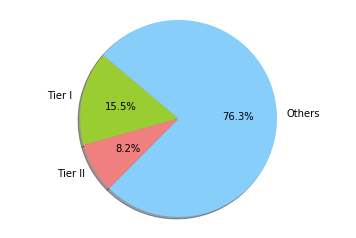

In [513]:
labels = ['Tier I', 'Tier II', 'Others']
sizes = (df_class['Tier'].groupby(df_class['Tier']).count() / len(df_class[['Tier']])).tolist()
colors = ['yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

In [514]:
df_class.shape

(6847, 144)

## Modeling

In [195]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [196]:
df_class = df_101_tier
X_train, X_test, y_train, y_test = train_test_split(df_class.iloc[:, :-1], 
                                                    df_class.iloc[:, -1], 
                                                    test_size=0.25, 
                                                    random_state=99)

### Random Forest

In [197]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)

In [198]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [199]:
y_predict = rf.predict(X_test)

In [201]:
print(classification_report(y_test, y_predict, target_names=['1','2']))

             precision    recall  f1-score   support

          1       0.92      0.99      0.95      3019
          2       0.62      0.14      0.23       312

avg / total       0.89      0.91      0.88      3331



Confusion matrix, without normalization
[[2993   26]
 [ 269   43]]


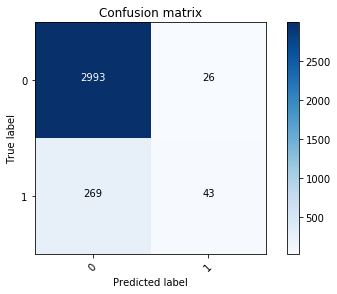

In [203]:
func.plot_confusion_matrix(confusion_matrix(y_test, y_predict, labels=[0,1]), classes=[0,1])

### Adaboost

In [498]:
ab = AdaBoostClassifier()

In [499]:
ab.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [500]:
y_predict = ab.predict(X_test)

In [501]:
print(classification_report(y_test, y_predict, target_names=['1','2','3']))

             precision    recall  f1-score   support

          1       0.50      0.21      0.30       275
          2       0.65      0.60      0.62       128
          3       0.84      0.95      0.89      1309

avg / total       0.77      0.81      0.78      1712



### SVM

In [482]:
svc = LinearSVC()
svc.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [483]:
y_predict = svc.predict(X_test)

Confusion matrix, without normalization
[[  67   21  187]
 [  19   71   38]
 [  63   15 1231]]


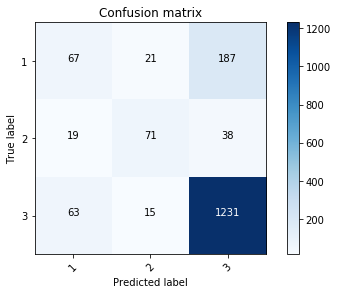

In [484]:
func.plot_confusion_matrix(confusion_matrix(y_test, y_predict, labels=[1,2,3]), classes=[1,2,3])

In [485]:
print(classification_report(y_test, y_predict, target_names=['1','2','3']))

             precision    recall  f1-score   support

          1       0.45      0.24      0.32       275
          2       0.66      0.55      0.60       128
          3       0.85      0.94      0.89      1309

avg / total       0.77      0.80      0.78      1712



In [2]:
import torch
from torch.autograd import Variable

In [3]:
a = Variable(torch.FloatTensor([[1,2,3], [2,3,4], [1,3,5]]))

In [5]:
torch.max(a.data)

5.0